# Projeto do Módulo 2 de Análise de Dados do DATASUS

Projeto de análise de dados do DATASUS, utilizando os dados de produção hospitalar. Ele aborda a relação entre **gastos** e **internações**.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Leitura dos Dados

In [24]:
# Ler o arquivo CSV para um DataFrame
cobertura_imunizacao_url = "https://github.com/cristlper/bootcamp-data-sciente-2-alura/raw/main/dados/cobertura_imunizacao_brasil_1994_2020.csv"
df = pd.read_csv(cobertura_imunizacao_url, encoding='ISO-8859-1', sep=";", thousands=".", decimal=",", engine='python')

# Exibir as primeiras 5 linhas
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Imprimir os nomes das colunas e seus tipos de dados
print(df.info())

| Unidade da Federação   | 1994   | 1995   | 1996   | 1997   | 1998   | 1999   | 2000   | 2001   | 2002   | 2003   | 2004   | 2005   | 2006   | 2007   | 2008   | 2009   | 2010   | 2011   | 2012   | 2013   | 2014   | 2015   | 2016   | 2017   | 2018   | 2019   | 2020   |  Total   |
|:-----------------------|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:---------|
| 11 Rondônia            | 93.86  | 101.12 | 104.31 | 120.42 | 122.22 | 113.72 | 111.6  | 114.36 | 102.43 | 97.42  | 106.6  | 109.69 | 121.15 | 114.13 | 105.86 | 107.64 | 102.79 | 105.79 | 106.12 | 108.15 | 110.07 | 110.77 | 104.9  | 97.81  | 93.61  | 88.11  | 75.09  | 105.27   |
| 12 Acre                | 61.01  | 110.92 | 84.33  | 95.83  | 99.73  | 97.32  | 112.32 | 134.96 | 132.91 | 121.07 | 116.13 | 110.46 | 116.02 | 122.55 | 108.

## Limpeza e Transformação dos Dados

In [25]:
# Remover espaços em branco no início e no final dos nomes das colunas
df.columns = df.columns.str.strip()

# Lista de colunas para converter para numérico, excluindo 'Unidade da Federação' e 'Total'
colunas_para_converter = list(df.columns[1:-1])

# Substituir ',' por '.' para conversão decimal nas colunas especificadas
for coluna in colunas_para_converter:
    df[coluna] = df[coluna].astype(str).str.replace(',', '.')

# Converter colunas para numérico
for coluna in colunas_para_converter:
    df[coluna] = pd.to_numeric(df[coluna])

# Substituir ',' por '.' para conversão decimal na coluna 'Total'
df['Total'] = df['Total'].astype(str).str.replace(',', '.')

# Converter a coluna 'Total' para numérico
df['Total'] = pd.to_numeric(df['Total'])

## Análise Exploratória de Dados

In [27]:
# Calcular a média de cobertura de imunização por ano
cobertura_media_por_ano = df[df.columns[1:-1]].mean()

# Calcular a média de cobertura de imunização por estado
cobertura_media_por_estado = df.groupby('Unidade da Federação')[df.columns[1:-1]].mean().mean(axis=1)

# Calcular a cobertura média geral de imunização
cobertura_media_geral = df[df.columns[1:-1]].values.mean()

# Calcular a cobertura mediana geral de imunização
cobertura_mediana_geral = np.median(df[df.columns[1:-1]].values)

# Encontrar o estado com a maior cobertura média
estado_maior_cobertura = cobertura_media_por_estado.idxmax()
maior_cobertura_valor = cobertura_media_por_estado.max()

# Encontrar o estado com a menor cobertura média
estado_menor_cobertura = cobertura_media_por_estado.idxmin()
menor_cobertura_valor = cobertura_media_por_estado.min()

# Calcular a variação percentual ano a ano na cobertura de imunização
variacao_anual = df[df.columns[1:-1]].mean().pct_change() * 100

# Encontrar o ano com o maior aumento
ano_maior_aumento = variacao_anual.idxmax()
maior_aumento_valor = variacao_anual.max()

# Encontrar o ano com a maior queda
ano_maior_queda = variacao_anual.idxmin()
maior_queda_valor = variacao_anual.min()

# Calcular o desvio padrão na cobertura de imunização para cada ano
desvio_padrao_por_ano = df[df.columns[1:-1]].std()

# Encontrar o ano com o maior desvio padrão
ano_maior_desvio_padrao = desvio_padrao_por_ano.idxmax()
maior_desvio_padrao_valor = desvio_padrao_por_ano.max()

# Encontrar o ano com o menor desvio padrão
ano_menor_desvio_padrao = desvio_padrao_por_ano.idxmin()
menor_desvio_padrao_valor = desvio_padrao_por_ano.min()

## Visualização

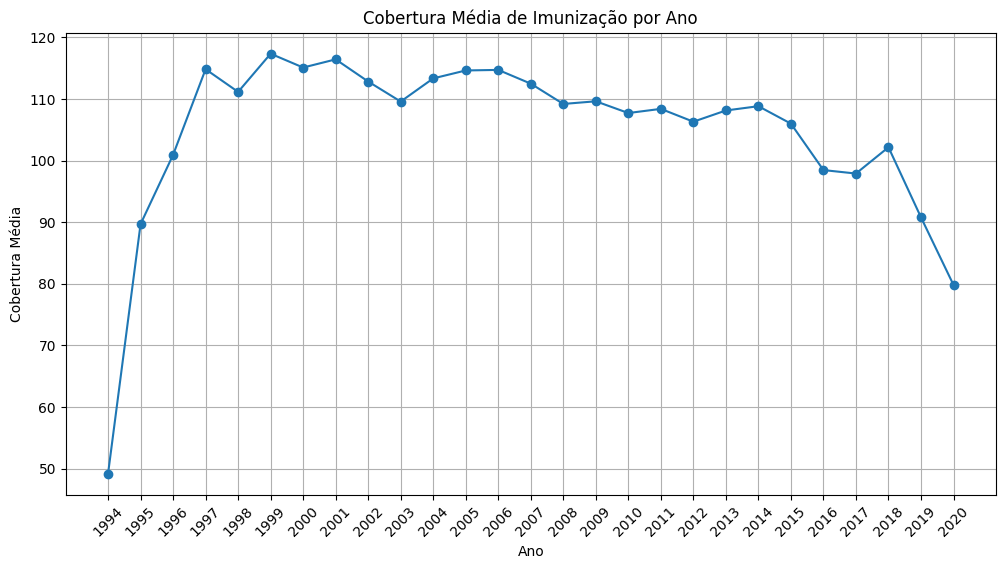

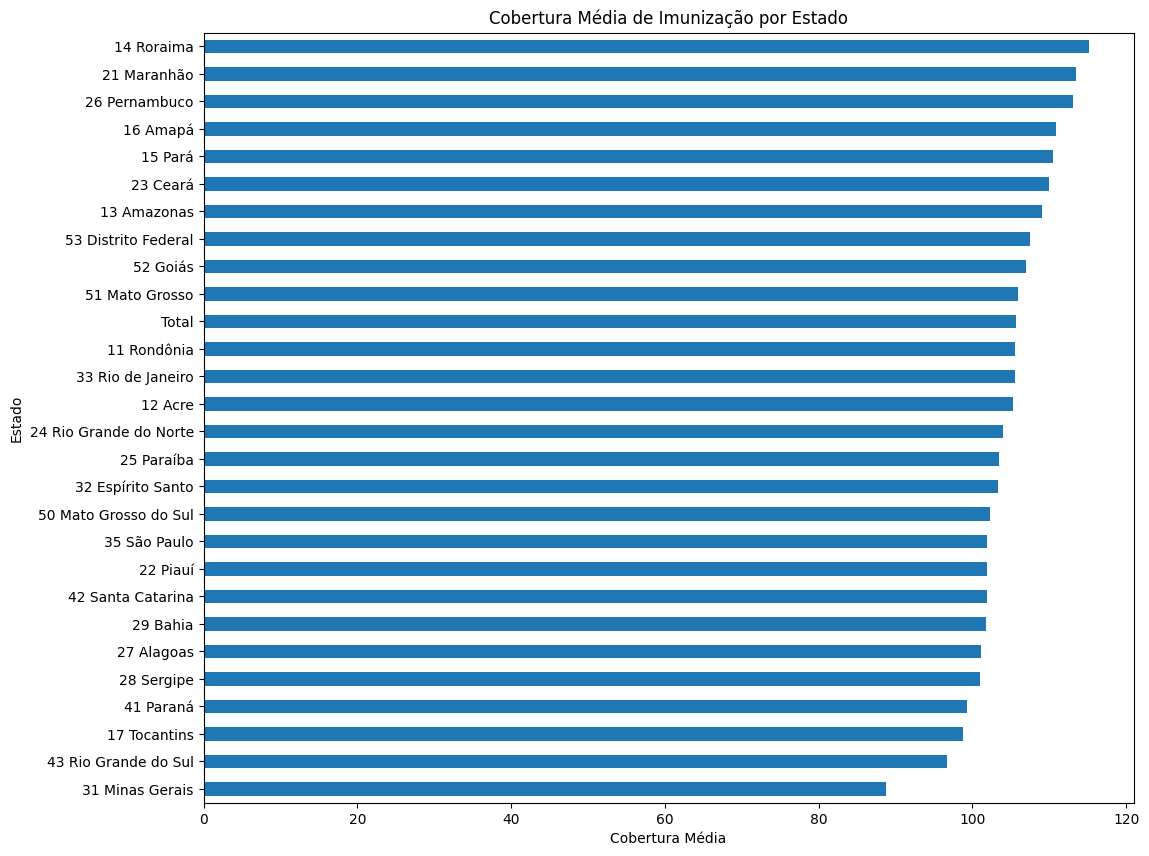

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:2294: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


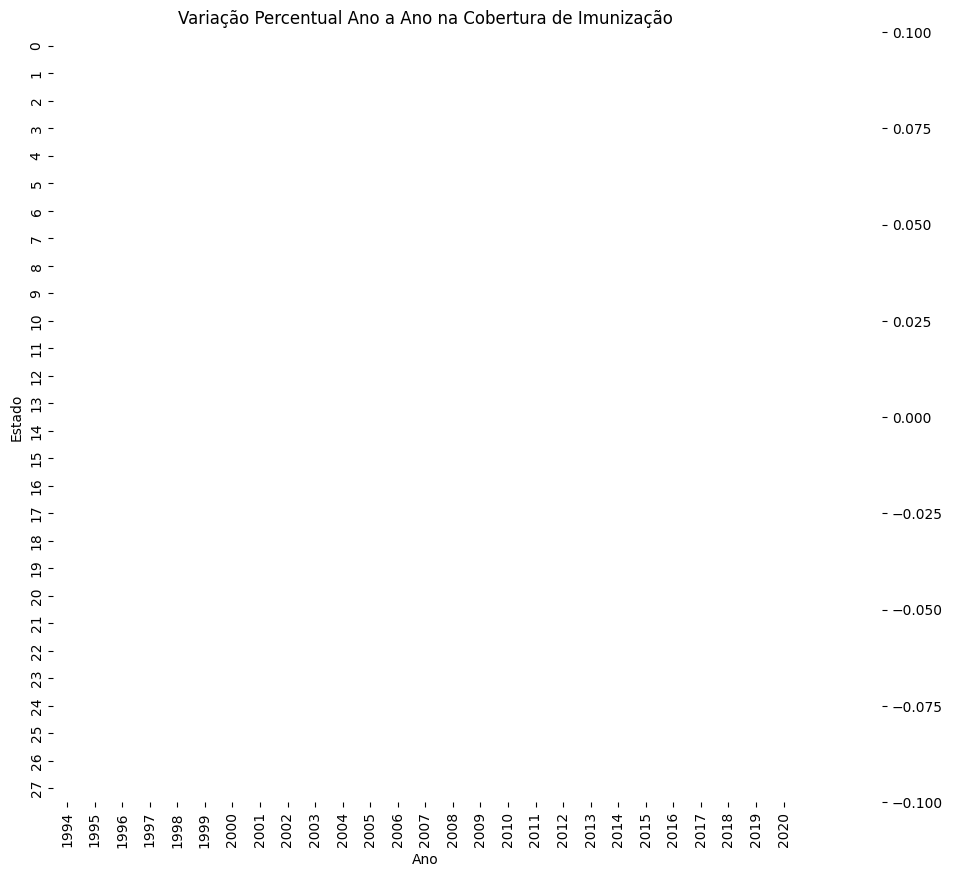

In [21]:
# Gráfico de linha para a cobertura média de imunização por ano
plt.figure(figsize=(12, 6))
plt.plot(cobertura_media_por_ano.index, cobertura_media_por_ano.values, marker='o')
plt.title('Cobertura Média de Imunização por Ano')
plt.xlabel('Ano')
plt.ylabel('Cobertura Média')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Gráfico de barras para a cobertura média de imunização por estado
plt.figure(figsize=(12, 10))
cobertura_media_por_estado.sort_values().plot(kind='barh')
plt.title('Cobertura Média de Imunização por Estado')
plt.xlabel('Cobertura Média')
plt.ylabel('Estado')
plt.show()

# Mapa de calor para a variação percentual ano a ano
plt.figure(figsize=(12, 10))
sns.heatmap(df[df.columns[1:-1]].pct_change(axis='columns') * 100, cmap='RdBu', center=0)
plt.title('Variação Percentual Ano a Ano na Cobertura de Imunização')
plt.xlabel('Ano')
plt.ylabel('Estado')
plt.show()

## Impressão dos Resultados da Análise

In [22]:
# Imprimir a cobertura média de imunização por ano
print("\nCobertura Média de Imunização por Ano:")
print(cobertura_media_por_ano.to_markdown(numalign="left", stralign="left"))

# Imprimir a cobertura média de imunização por estado
print("\nCobertura Média de Imunização por Estado:")
print(cobertura_media_por_estado.to_markdown(numalign="left", stralign="left"))

# Imprimir a cobertura média e mediana geral de imunização
print(f"\nCobertura Média Geral de Imunização: {cobertura_media_geral:.2f}")
print(f"Cobertura Mediana Geral de Imunização: {cobertura_mediana_geral:.2f}")

# Imprimir o estado com a maior e menor cobertura média
print("\nEstado com a Maior Cobertura Média de Imunização:")
print(f"{estado_maior_cobertura}: {maior_cobertura_valor:.2f}")

print("\nEstado com a Menor Cobertura Média de Imunização:")
print(f"{estado_menor_cobertura}: {menor_cobertura_valor:.2f}")

# Imprimir o ano com o maior aumento e a maior queda
print("\nAno com o Maior Aumento na Cobertura de Imunização:")
print(f"{ano_maior_aumento}: {maior_aumento_valor:.2f}%")

print("\nAno com a Maior Queda na Cobertura de Imunização:")
print(f"{ano_maior_queda}: {maior_queda_valor:.2f}%")

# Imprimir os anos com o maior e menor desvio padrão
print("\nAno com o Maior Desvio Padrão na Cobertura de Imunização:")
print(f"{ano_maior_desvio_padrao}: {maior_desvio_padrao_valor:.2f}")

print("\nAno com o Menor Desvio Padrão na Cobertura de Imunização:")
print(f"{ano_menor_desvio_padrao}: {menor_desvio_padrao_valor:.2f}")


Cobertura Média de Imunização por Ano:
|      | 0       |
|:-----|:--------|
| 1994 | 49.1675 |
| 1995 | 89.6896 |
| 1996 | 100.932 |
| 1997 | 114.832 |
| 1998 | 111.154 |
| 1999 | 117.35  |
| 2000 | 115.107 |
| 2001 | 116.433 |
| 2002 | 112.835 |
| 2003 | 109.584 |
| 2004 | 113.345 |
| 2005 | 114.633 |
| 2006 | 114.723 |
| 2007 | 112.49  |
| 2008 | 109.196 |
| 2009 | 109.628 |
| 2010 | 107.72  |
| 2011 | 108.398 |
| 2012 | 106.314 |
| 2013 | 108.135 |
| 2014 | 108.831 |
| 2015 | 106     |
| 2016 | 98.4611 |
| 2017 | 97.8975 |
| 2018 | 102.167 |
| 2019 | 90.7868 |
| 2020 | 79.8164 |

Cobertura Média de Imunização por Estado:
| Unidade da Federação   | 0       |
|:-----------------------|:--------|
| 11 Rondônia            | 105.546 |
| 12 Acre                | 105.247 |
| 13 Amazonas            | 109.019 |
| 14 Roraima             | 115.184 |
| 15 Pará                | 110.431 |
| 16 Amapá               | 110.881 |
| 17 Tocantins           | 98.7389 |
| 21 Maranhão            | 113.41

## Conclusões

## Análise Geral da Cobertura de Imunização

- A cobertura média geral de imunização no período analisado é de aproximadamente 104.65%, com uma mediana de 106.75%.
- Esses valores indicam uma cobertura geral relativamente alta, com a mediana ligeiramente acima da média, sugerindo uma distribuição um pouco assimétrica, onde a maioria dos anos e estados apresenta uma cobertura acima de 100%.

## Variação da Cobertura ao Longo do Tempo

- A cobertura de imunização apresentou uma variação significativa ao longo dos anos.
- Houve um aumento notável na cobertura de 1994 para 1995, com um aumento de 82.42%, o maior aumento anual observado.
- No entanto, a cobertura mostrou uma tendência de queda nos anos mais recentes, com a maior queda registrada em 2020, com uma diminuição de -12.08%.
- Essa queda em 2020 pode ser um ponto de preocupação e merece uma investigação mais aprofundada para entender os fatores contribuintes.

## Disparidades Regionais

- Há disparidades significativas na cobertura de imunização entre os diferentes estados.
- Roraima se destaca com a maior cobertura média de 115.18%, enquanto Minas Gerais apresenta a menor cobertura média de 88.82%.
- Essas disparidades regionais podem refletir diferenças nas políticas de saúde, acesso aos serviços de saúde, conscientização da população ou outros fatores socioeconômicos.

## Desvio Padrão e Volatilidade

- A cobertura de imunização também apresentou variações em termos de volatilidade ao longo dos anos.
- O ano de 1994 apresentou o maior desvio padrão (45.97), indicando uma alta dispersão nos níveis de cobertura entre os estados naquele ano.
- Em contraste, o ano de 2012 apresentou o menor desvio padrão (6.49), sugerindo uma maior homogeneidade na cobertura entre os estados naquele ano.

## Limitações
- O projeto atual se concentra na análise descritiva dos dados de cobertura de imunização, sem explorar as causas subjacentes das tendências e disparidades observadas.
- Os dados utilizados são limitados às taxas de cobertura, sem incluir informações sobre os tipos de vacinas, grupos populacionais específicos ou outros fatores relevantes.
- O projeto não incorpora outras fontes de dados que poderiam enriquecer a análise, como dados socioeconômicos, demográficos ou de infraestrutura de saúde.

## Sugestões para Projetos Futuros
- Investigar os fatores determinantes da cobertura de imunização, como políticas de saúde, acesso aos serviços de saúde, conscientização da população, fatores socioeconômicos e culturais.
- Analisar a cobertura de imunização para vacinas específicas e grupos populacionais específicos, como crianças, adultos ou idosos.
- Incorporar outras fontes de dados para enriquecer a análise, como dados socioeconômicos, demográficos, de infraestrutura de saúde, de morbidade e mortalidade, ou de campanhas de vacinação.
- Utilizar técnicas de modelagem estatística e aprendizado de máquina para prever a cobertura de imunização e identificar áreas de risco.
- Desenvolver um painel interativo para visualizar os dados de cobertura de imunização e facilitar a exploração dos resultados.

##Fontes
- Os dados utilizados neste projeto são provenientes do DataSUS (Departamento de Informática do Sistema Único de Saúde do Brasil).
- A documentação e informações adicionais sobre os dados podem ser encontradas no site do DataSUS.